In [20]:
!unzip /content/hard.zip
!unzip /content/easy.zip
!unzip /content/medium.zip

Archive:  /content/hard.zip
   creating: hard/
  inflating: hard/apple (15).jpg     
  inflating: hard/apple (16).jpg     
  inflating: hard/apple (17).jpg     
  inflating: hard/apple (5).jpg      
  inflating: hard/images.jpg         
Archive:  /content/easy.zip
   creating: easy/
  inflating: easy/apple (1).jpg      
  inflating: easy/apple (10).jpg     
  inflating: easy/apple (11).jpg     
  inflating: easy/apple (12).jpg     
  inflating: easy/apple (13).jpg     
  inflating: easy/apple (14).jpg     
  inflating: easy/apple (16).jpg     
  inflating: easy/apple (6).jpg      
Archive:  /content/medium.zip
   creating: medium/
  inflating: medium/apple (18).jpg   
  inflating: medium/apple (19).jpg   
  inflating: medium/apple (20).jpg   
  inflating: medium/apple (21).jpg   
  inflating: medium/apple (22).jpg   
  inflating: medium/apple (24).jpg   


In [10]:
!pip install torch torchvision
!pip install yolov5
!pip install ipywidgets

# Import libraries
import torch
from matplotlib import pyplot as plt
import os
import random
from IPython.display import display, Image
import ipywidgets as widgets


In [11]:
# Load YOLOv5 pre-trained model (small version for speed)
model = torch.hub.load('ultralytics/yolov5', 'yolov5s')

Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 2024-12-31 Python-3.10.12 torch-2.5.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


Button(description='Easy', style=ButtonStyle())

Button(description='Medium', style=ButtonStyle())

Button(description='Hard', style=ButtonStyle())

/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


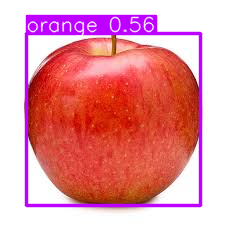

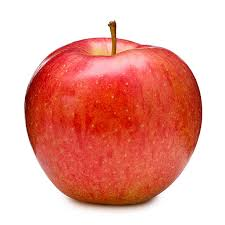

IntText(value=0, description='Your Guess:', style=DescriptionStyle(description_width='initial'))

Button(description='Submit Guess', style=ButtonStyle())

Button(description='Quit', style=ButtonStyle())

In [28]:

# Define the difficulty levels
datasets = {
    'easy': '/content/easy',
    'medium': '/content/medium',
    'hard': '/content/hard'
}

# Define fruit classes for each difficulty level
fruit_classes_dict = {
    'easy': ['apple'],
    'medium': ['apple'],
    'hard': ['apple']
}

# Global variable to store current dataset and classes
current_difficulty = 'easy'  # Default difficulty level

# Global variables for game state
image_folder = datasets[current_difficulty]
fruit_classes = fruit_classes_dict[current_difficulty]
img_path = ""
fruit_count = 0

# Function to load a new dataset based on the difficulty
def load_new_dataset(difficulty):
    global current_difficulty, image_folder, fruit_classes
    current_difficulty = difficulty
    image_folder = datasets[difficulty]
    fruit_classes = fruit_classes_dict[difficulty]

# Function to select a random image and perform inference
def select_random_image_and_inference():
    global img_path, fruit_count
    # Select a random image from the dataset
    image_files = os.listdir(image_folder)
    random_image_file = random.choice(image_files)
    img_path = os.path.join(image_folder, random_image_file)

    # Perform inference (detect objects in the image)
    results = model(img_path)

    # Get the predictions from the model (including class labels and confidence scores)
    predictions = results.xywh[0]  # Bounding boxes for detected objects
    detected_classes = predictions[:, -1]  # Class IDs of detected objects
    labels = results.names  # Class labels (e.g., apple, banana, etc.)

    # Filter the detected fruits
    detected_fruit_classes = [labels[int(class_id)] for class_id in detected_classes]

    # Count the number of detected fruits in the selected classes
    fruit_count = sum([detected_fruit_classes.count(fruit) for fruit in fruit_classes])

    # Show the result image with bounding boxes
    results.show()
    display(Image(filename=img_path))
# Function to display the widgets and run the guess-checking logic
def display_game_widgets():
    # Create a widgets for the user to input their guess
    guess_widget = widgets.IntText(
        value=0,
        description='Your Guess:',
        min=0,
        max=20,
        step=1,
        style={'description_width': 'initial'}
    )

    # Create a button to submit the guess
    submit_button = widgets.Button(description="Submit Guess")

    # Create a quit button
    quit_button = widgets.Button(description="Quit")

    # Function to check the guess and display result
    def check_guess(b):
        user_guess = guess_widget.value
        if user_guess == fruit_count:
            print(f"Correct! There are {fruit_count} apples in the image.")
        else:
            print(f"Oops! Your guess was wrong. There are {fruit_count} apples in the image.")

        # Display the next image and allow the user to guess again
        select_random_image_and_inference()
        display_game_widgets()

    # Link the button to the check_guess function
    submit_button.on_click(check_guess)

    # Function to quit the game
    def quit_game(b):
        print("Thank you for playing! The game has ended.")
        quit_button.disabled = True
        submit_button.disabled = True
        guess_widget.disabled = True

    # Link the quit button to quit_game function
    quit_button.on_click(quit_game)

    # Display the widgets
    display(guess_widget)
    display(submit_button)
    display(quit_button)

# Difficulty button handler
def on_difficulty_button_click(b):
    difficulty_level = b.description.lower()  # Get the difficulty level from the button's label
    load_new_dataset(difficulty_level)
    select_random_image_and_inference()
    display_game_widgets()

# Create difficulty buttons
easy_button = widgets.Button(description="Easy")
medium_button = widgets.Button(description="Medium")
hard_button = widgets.Button(description="Hard")

# Link the buttons to the handler
easy_button.on_click(on_difficulty_button_click)
medium_button.on_click(on_difficulty_button_click)
hard_button.on_click(on_difficulty_button_click)

# Display the difficulty buttons
display(easy_button, medium_button, hard_button)

# Start the game by selecting a random image
select_random_image_and_inference()

# Display the game widgets to take a guess
display_game_widgets()
